# Program Mendeteksi Adanya Plagiasi Pada Gambar

## Ruang Lingkup Plagiasi

Plagiasi dapat didefinisikan sebagai pengambilan karangan (pendapat dan sebagainya) orang lain dan menjadikannya seolah-olah karangan (pendapat) sendiri. Plagiasi dapat terjadi dalam banyak bentuk, salah satu nya adalah pada karya dalam bentuk gambar.

Pada Nine Hustle, plagiasi dibatasi pada terdapatnya kesamaan antara karya yang diunggah oleh salah satu pihak terhadap karya dari pihak lain yang telah tersimpan pada database Nine Hustle.

Program ini dibuat dengan tujuan untuk mencari algoritma untuk mendeteksi adanya plagiasi.

## Metode Pertama : Menggunakan Mean Squared Error

Persamaan umum dari mean squared error adalah sebagai berikut : 

$$MSE = \Sigma(Y_i-Y)^2$$

$Y_i$ merupakan variabel pertama sedangkan $Y$ merupakan variabel kedua. Kondisi plagiasi dari persamaan ini digambarkan sebagai jika nilai $Y_i=Y$. Jika $Y_i=Y$ maka nilai $MSE=0$. Sehingga dapat disimpulkan bahwa fenomena plagiasi adalah ketika nilai MSE antara gambar yang diinputkan oleh freelance sama persis dengan referensi gambar yang ada di database Nine Hustle.

Pada metode ini pengukuran kesamaan diukur menggunakan persamaan sebagai berikut : 
$$SIM RATE = \frac{1}{MSE+1} * 100\%$$

Jika $MSE$ bernilai 0 maka $SIM RATE$ akan bernilai 100%. Jika $SIM RATE$ bernilai 100% maka terdapat indikasi bahwa gambar yang diunggah memiliki potensi untuk dikategorikan sebagai plagiasi

In [1]:
!pip install Pillow

In [2]:
!pip install opencv-python

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import shutil

2023-04-11 18:45:52.991314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
!pwd

/Volumes/Kerja_Keras/Folder_Fold_Recovery/For Professional/Code_To_Nine_Hustle


In [5]:
new_path="Data_Gambar/Data_Masuk"
try:
    os.makedirs(new_path)
except FileExistsError:
    print("File Sudah Ada")

File Sudah Ada


In [6]:
file_isi_gambar_1="training_set/training_set/cats"
file_isi_gambar_2="training_set/training_set/dogs"
file_isi_gambar_3="test_set/test_set/cats"
file_isi_gambar_4="test_set/test_set/dogs"
file_isi_gambar_5="archive/images"

In [7]:
def hapus_dot_underscore(lokasi,files):
    for index,filee in enumerate(files):
        if filee.startswith('._'):
            os.remove(os.path.join(lokasi,filee))

def ambil_list_gambar(files):
    return [file for _,file in enumerate(os.listdir(files))]

def pindahkan_ke_file_baru(old_location,new_location):
    l_gambar=[file for _,file in enumerate(os.listdir(old_location))]
    jumlah_gambar=len(l_gambar)
    for i in range(0,jumlah_gambar):
        old_file = os.path.join(old_location, l_gambar[i])
        new_file = os.path.join(new_location, l_gambar[i])
        if os.path.exists(new_file):
            os.replace(old_file, new_file)
        else:
            shutil.copy(old_file,new_file)

def rename_files(path, prefix):
    i = 1
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        if os.path.isfile(file_path):
            file_ext = "." + file_name.split(".")[-1]
            new_file_name = "{}_{}{}".format(prefix, i, file_ext)
            new_file_path = os.path.join(path, new_file_name)
            if not os.path.exists(new_file_path):
                os.rename(file_path, new_file_path)
                i += 1

In [8]:
set_gambar_1=ambil_list_gambar(file_isi_gambar_1)
set_gambar_2=ambil_list_gambar(file_isi_gambar_2)
set_gambar_3=ambil_list_gambar(file_isi_gambar_3)
set_gambar_4=ambil_list_gambar(file_isi_gambar_4)
set_gambar_5=ambil_list_gambar(file_isi_gambar_5)

In [9]:
pindahkan_ke_file_baru(file_isi_gambar_1,"Data_Gambar/Data_Masuk/")
pindahkan_ke_file_baru(file_isi_gambar_2,"Data_Gambar/Data_Masuk/")
pindahkan_ke_file_baru(file_isi_gambar_3,"Data_Gambar/Data_Masuk/")
pindahkan_ke_file_baru(file_isi_gambar_4,"Data_Gambar/Data_Masuk/")
pindahkan_ke_file_baru(file_isi_gambar_5,"Data_Gambar/Data_Masuk/")

In [10]:
print(os.listdir("Data_Gambar/Data_Masuk"))

['img__2.jpg', 'img__3.jpg', 'img__4.jpg', 'img__5.jpg', 'img__6.jpg', 'img__7.jpg', 'img__8.jpg', 'img__9.jpg', 'img__10.jpg', 'img__11.jpg', 'img__12.jpg', 'img__13.jpg', 'img__14.jpg', 'img__15.jpg', 'img__16.jpg', 'img__17.jpg', 'img__18.jpg', 'img__19.jpg', 'img__20.jpg', 'img__21.jpg', 'img__22.jpg', 'img__23.jpg', 'img__24.jpg', 'img__25.jpg', 'img__26.jpg', 'img__27.jpg', 'img__28.jpg', 'img__29.jpg', 'img__30.jpg', 'img__31.jpg', 'img__32.jpg', 'img__33.jpg', 'img__34.jpg', 'img__35.jpg', 'img__36.jpg', 'img__37.jpg', 'img__38.jpg', 'img__39.jpg', 'img__40.jpg', 'img__41.jpg', 'img__42.jpg', 'img__43.jpg', 'img__44.jpg', 'img__45.jpg', 'img__46.jpg', 'img__47.jpg', 'img__48.jpg', 'img__49.jpg', 'img__50.jpg', 'img__51.jpg', 'img__52.jpg', 'img__53.jpg', 'img__54.jpg', 'img__55.jpg', 'img__56.jpg', 'img__57.jpg', 'img__58.jpg', 'img__59.jpg', 'img__60.jpg', 'img__61.jpg', 'img__62.jpg', 'img__63.jpg', 'img__64.jpg', 'img__65.jpg', 'img__66.jpg', 'img__67.jpg', 'img__68.jpg', 'i

In [11]:
rename_files("Data_Gambar/Data_Masuk","img_")

In [12]:
print(os.listdir("Data_Gambar/"))

['Data_Masuk']


In [13]:
hapus_dot_underscore("Data_Gambar/Data_Masuk",os.listdir("Data_Gambar/Data_Masuk"))

In [14]:
print(os.listdir("Data_Gambar/Data_Masuk"))

['img__2.jpg', 'img__3.jpg', 'img__4.jpg', 'img__5.jpg', 'img__6.jpg', 'img__7.jpg', 'img__8.jpg', 'img__9.jpg', 'img__10.jpg', 'img__11.jpg', 'img__12.jpg', 'img__13.jpg', 'img__14.jpg', 'img__15.jpg', 'img__16.jpg', 'img__17.jpg', 'img__18.jpg', 'img__19.jpg', 'img__20.jpg', 'img__21.jpg', 'img__22.jpg', 'img__23.jpg', 'img__24.jpg', 'img__25.jpg', 'img__26.jpg', 'img__27.jpg', 'img__28.jpg', 'img__29.jpg', 'img__30.jpg', 'img__31.jpg', 'img__32.jpg', 'img__33.jpg', 'img__34.jpg', 'img__35.jpg', 'img__36.jpg', 'img__37.jpg', 'img__38.jpg', 'img__39.jpg', 'img__40.jpg', 'img__41.jpg', 'img__42.jpg', 'img__43.jpg', 'img__44.jpg', 'img__45.jpg', 'img__46.jpg', 'img__47.jpg', 'img__48.jpg', 'img__49.jpg', 'img__50.jpg', 'img__51.jpg', 'img__52.jpg', 'img__53.jpg', 'img__54.jpg', 'img__55.jpg', 'img__56.jpg', 'img__57.jpg', 'img__58.jpg', 'img__59.jpg', 'img__60.jpg', 'img__61.jpg', 'img__62.jpg', 'img__63.jpg', 'img__64.jpg', 'img__65.jpg', 'img__66.jpg', 'img__67.jpg', 'img__68.jpg', 'i

In [15]:
base_dir="Data_Gambar/Data_Masuk"

## Percobaan Menghitung MSE Antara Dua Gambar

In [16]:
os.listdir("Percobaan_2_gambar")

['Gambar1.jpeg', 'Gambar3.jpeg', 'Gambar2.jpeg', 'Gambar4.jpeg']

In [17]:
import cv2

In [18]:
gambar=[]
gambar_final=[]

In [19]:
hapus_dot_underscore("Percobaan_2_gambar/",os.listdir("Percobaan_2_gambar"))

In [20]:
os.listdir("Percobaan_2_gambar")

['Gambar1.jpeg', 'Gambar3.jpeg', 'Gambar2.jpeg', 'Gambar4.jpeg']

In [21]:
for _,file in enumerate(os.listdir("Percobaan_2_gambar")):
    gambar.append(cv2.imread("Percobaan_2_gambar/"+file))

In [22]:
gambar

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [23]:
!pip install matplotlib

In [24]:
import numpy as np
import matplotlib.pyplot as plt

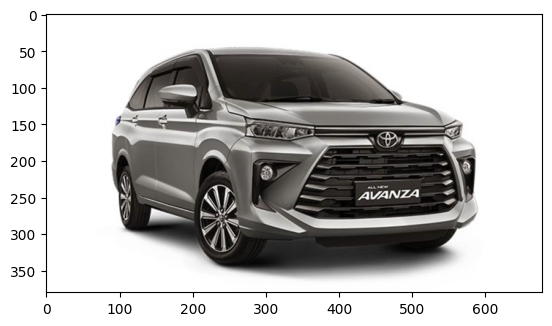

In [40]:
plt.imshow(gambar[0])

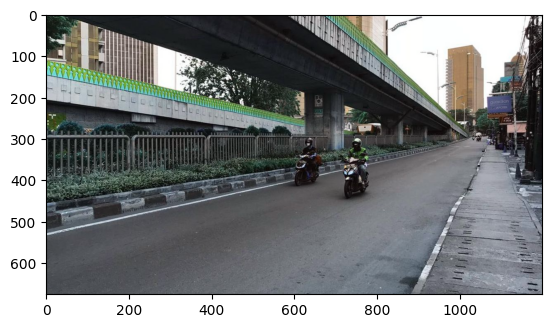

In [43]:
plt.imshow(gambar[1])

In [27]:
def hitung_mean_squared_error_gambar(image1,image2):
    image1=cv2.resize(image1,(225,225))
    image2=cv2.resize(image2,(225,225))
    n1=image1.shape[0]*image1.shape[1]
    n2=image2.shape[0]*image2.shape[1]
    if n1==n2:
        n=n1
        y_squared=((image1-image2)**2)
        sum_diff_square=np.sum(np.sum(y_squared,axis=0))
        sum_diff_square=sum_diff_square/n
    else:
        print("Ukuran Gambar Tidak Sama")
    return sum_diff_square

def hitung_similarity_rate(sse):
    #Keluaran Dalam Persen
    return (1/(sse+1))*100

## Pengujian Menggunakan Dua Gambar

In [45]:
mse_gambar=hitung_mean_squared_error_gambar(gambar[0],gambar[1])
sr_gambar=hitung_similarity_rate(mse_gambar)
print("Gambar Memiliki Kesamaan Sebesar "+str(sr_gambar*100)+"%")

Gambar Memiliki Kesamaan Sebesar 32.44141496988187%


In [29]:
mse_gambar1=hitung_mean_squared_error_gambar(gambar[0],gambar[0])
sr_gambar1=hitung_similarity_rate(mse_gambar1)
print("Gambar Memiliki Kesamaan Sebesar "+str(sr_gambar1)+"%")


Gambar Memiliki Kesamaan Sebesar 100.0%


## Pengujian Menggunakan Satu Gambar Dengan Database Gambar Yang Ada

In [30]:
gambar_database=[]
count_img_error=0
for filename in os.listdir("Data_Gambar/Data_Masuk"):
    try:
        gam_gam=cv2.imread(os.path.join("Data_Gambar/Data_Masuk",filename))
        gam_gam=cv2.resize(gam_gam,(225,225))
        gambar_database.append(gam_gam)
    except:
        count_img_error+=1

print("Jumlah Gambar Bermasalah Adalah "+str(count_img_error))
rasio_gambar_benar_terhadap_error=count_img_error/len(os.listdir("Data_Gambar/Data_Masuk"))
print("Perbandingan Jumlah Gambar Error Terhadap Semua Gambar Adalah "+str(rasio_gambar_benar_terhadap_error))

Jumlah Gambar Bermasalah Adalah 876
Perbandingan Jumlah Gambar Error Terhadap Semua Gambar Adalah 0.03717692993252133


In [31]:
error_rate_list=[]
gambar_masukan=[gambar[3]]
for i in gambar_masukan:
    for j in gambar_database:
        error_rate_list.append(hitung_mean_squared_error_gambar(i,j))

In [32]:
error_rate=min(error_rate_list)
sim_rate=hitung_similarity_rate(error_rate)
print("Gambar Memiliki Tingkat Kesamaan Sebesar "+str(sim_rate*100)+" Persen")

Gambar Memiliki Tingkat Kesamaan Sebesar 35.3580511661906 Persen


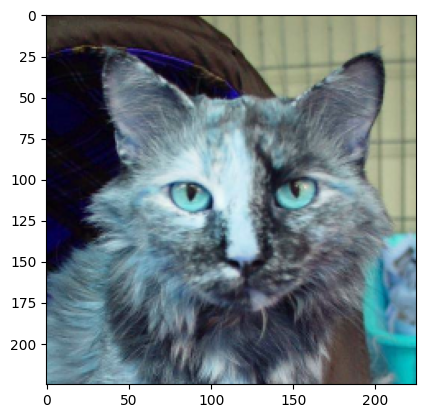

In [33]:
plt.imshow(gambar_database[0])

## Metode Kedua Menggunakan compare_ssim dari skimage.measure

In [34]:
!pip install -U scikit-learn

In [35]:
!pip install -U scikit-image

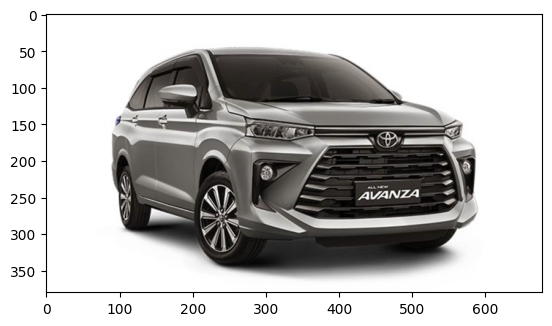

In [37]:
gambar21=gambar[0]
gambar22=gambar[1]
plt.imshow(gambar21)

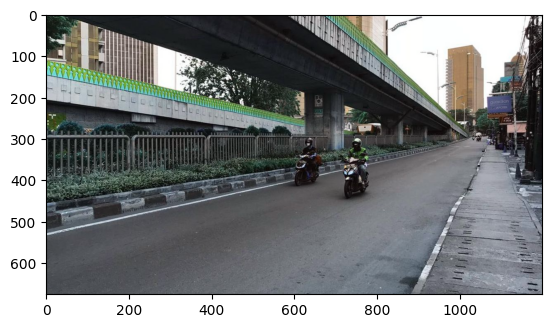

In [38]:
plt.imshow(gambar[1])

In [47]:
from skimage.metrics import structural_similarity as compare_ssim

In [55]:
g11=cv2.resize(gambar[0],(225,225))
g12=cv2.resize(gambar[1],(225,225))
kesamaan = compare_ssim(g11,g12,win_size=3,multichannel=True)

In [56]:
print(kesamaan*100)

18.393112113504337
